In [23]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# This is new
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [24]:
# fetch data 

mco_syr_sw_data = pd.read_csv('flight_data\mco_syr_sw_22_23.csv')
mco_syr_jb_data = pd.read_csv('flight_data\mco_syr_jb_22_23.csv')
jfk_syr_jb_data = pd.read_csv('flight_data\jfk_syr_jb_22_23.csv')
jfk_syr_end_data = pd.read_csv('flight_data\jfk_syr_end_22_23.csv')
ord_syr_ua_data = pd.read_csv('flight_data\ord_syr_ua_22_23.csv')
ord_syr_aa_data = pd.read_csv('flight_data\ord_syr_aa_22_23.csv')
# mco_syr_sw_data.head()
# mco_syr_jb_data.head()
# jfk_syr_jb_data.head()
# jfk_syr_end_data.head()
# ord_syr_ua_data.head()
# ord_syr_aa_data.head()

In [25]:
dfs = [ord_syr_aa_data,ord_syr_ua_data,jfk_syr_end_data,jfk_syr_jb_data,mco_syr_jb_data,mco_syr_sw_data]
main_data = pd.concat(dfs,axis = 0)
main_data.head()
len(main_data)

,Unnamed: 0,Carrier_Code,Date,Flight_Number,Tail_Number,Destination_Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),...,Wheels-on Time,Taxi-In time (Minutes),arr_Delay_Carrier,arr_Delay_Weather,arr_Delay_National_Aviation_System,arr_Delay_Security,arr_Delay_Late_Aircraft_Arrival,arr_hour,arr_day,arr_year
0,0,MQ,2022-01-01,4316,N900AE,SYR,15:28,0:00,107,0,...,0:00,0,0,0,0,0,0,18,5,2022
1,1,MQ,2023-01-01,3392,N283NN,SYR,18:25,18:24,111,104,...,21:02,6,0,0,0,0,0,21,6,2023
2,2,MQ,2023-01-01,3518,N213NN,SYR,13:05,13:01,117,96,...,15:33,4,0,0,0,0,0,16,6,2023
3,3,MQ,2022-01-02,4134,N900AE,SYR,10:25,10:21,111,146,...,13:43,4,0,0,31,0,0,13,6,2022
4,4,MQ,2022-01-02,4253,N238NN,SYR,17:25,17:51,107,116,...,20:40,7,0,26,9,0,0,20,6,2022


5623

In [26]:
main_data.dtypes



Unnamed: 0                             int64
Carrier_Code                          object
Date                                  object
Flight_Number                          int64
Tail_Number                           object
Destination_Airport                   object
Scheduled departure time              object
Actual departure time                 object
Scheduled elapsed time (Minutes)       int64
Actual elapsed time (Minutes)          int64
Departure delay (Minutes)              int64
Wheels-off time                       object
Taxi-Out time (Minutes)                int64
dep_Delay_Carrier                      int64
dep_Delay_Weather                      int64
dep_Delay_National_Aviation_System     int64
dep_Delay_Security                     int64
dep_Delay_Late_Aircraft_Arrival        int64
dep_hour                               int64
dep_day                                int64
dep_year                               int64
dep_order                             object
Origin_Air

In [27]:
sub_data = main_data.drop(columns = ['Unnamed: 0','Destination_Airport','Actual departure time','Scheduled elapsed time (Minutes)','Actual elapsed time (Minutes)',
                         'Wheels-off time','Taxi-Out time (Minutes)','dep_Delay_Carrier',
                         'dep_Delay_Weather','dep_Delay_National_Aviation_System','dep_Delay_Security','dep_Delay_Late_Aircraft_Arrival',
                         'dep_year','Actual Arrival Time','Wheels-on Time','Taxi-In time (Minutes)','arr_Delay_Carrier','arr_Delay_Weather',
                         'arr_Delay_National_Aviation_System','arr_Delay_Security','arr_Delay_Late_Aircraft_Arrival','arr_year'])

In [28]:
sub_data.dtypes


Carrier_Code                 object
Date                         object
Flight_Number                 int64
Tail_Number                  object
Scheduled departure time     object
Departure delay (Minutes)     int64
dep_hour                      int64
dep_day                       int64
dep_order                    object
Origin_Airport               object
Scheduled Arrival Time       object
Arrival Delay (Minutes)       int64
arr_hour                      int64
arr_day                       int64
dtype: object

In [29]:
sub_data.head()

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,Scheduled Arrival Time,Arrival Delay (Minutes),arr_hour,arr_day
0,MQ,2022-01-01,4316,N900AE,15:28,0,15,5,latter,ORD,18:15,0,18,5
1,MQ,2023-01-01,3392,N283NN,18:25,-1,18,6,latter,ORD,21:16,-8,21,6
2,MQ,2023-01-01,3518,N213NN,13:05,-4,13,6,latter,ORD,16:02,-25,16,6
3,MQ,2022-01-02,4134,N900AE,10:25,-4,10,6,latter,ORD,13:16,31,13,6
4,MQ,2022-01-02,4253,N238NN,17:25,26,17,6,latter,ORD,20:12,35,20,6


In [30]:
sub_data['dep_min'] = sub_data['Scheduled departure time'].str.split(":").str[1].astype('int64')
# def round_to_nearest_quarter(minute):
#     if 0 <= minute < 14:
#         return 0
#     elif 15 <= minute < 29:
#         return 15
#     elif 30 <= minute < 44:
#         return 30
#     else:
#         return 45
sub_data['Date'] = pd.to_datetime( sub_data['Date'],format ="%Y-%m-%d")
sub_data['Date'] = sub_data['Date'].dt.strftime('%m/%d/%Y')
sub_data['dep_minutes'] = 0
sub_data['dep_minutes'] = sub_data['dep_minutes'].astype('object')
sub_data['dep_hours'] = sub_data['dep_hour'].astype('object')
sub_data['dep_min'] = sub_data['dep_min'].astype('object')
sub_data['arr_min'] = main_data['Scheduled Arrival Time'].str.split(":").str[1].astype('int64')
sub_data['arr_minutes'] = 0
sub_data['arr_minutes'] = sub_data['arr_minutes'].astype('object')
sub_data['arr_hours'] = sub_data['arr_hour'].astype('object')
sub_data['arr_min'] = sub_data['arr_min'].astype('object')
sub_data['Flight_Number'] = main_data['Flight_Number'].astype('object')
sub_data['dep_hour'] = main_data['dep_hour'].astype('object')
sub_data['dep_day'] = main_data['dep_day'].astype('object')
sub_data['arr_hour'] = main_data['arr_hour'].astype('object')
sub_data['arr_day'] = main_data['arr_day'].astype('object')
conditions = [
    (sub_data['Arrival Delay (Minutes)'] > 5),
    (sub_data['Arrival Delay (Minutes)'] >=-5) & (sub_data['Arrival Delay (Minutes)'] <= 5),
    (sub_data['Arrival Delay (Minutes)'] < -5)
]
choices = [2,1,0]
sub_data['arr_status'] = np.select(conditions, choices)
sub_data.dtypes
sub_data.head()

Carrier_Code                 object
Date                         object
Flight_Number                object
Tail_Number                  object
Scheduled departure time     object
Departure delay (Minutes)     int64
dep_hour                     object
dep_day                      object
dep_order                    object
Origin_Airport               object
Scheduled Arrival Time       object
Arrival Delay (Minutes)       int64
arr_hour                     object
arr_day                      object
dep_min                      object
dep_minutes                  object
dep_hours                    object
arr_min                      object
arr_minutes                  object
arr_hours                    object
arr_status                    int32
dtype: object

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,Arrival Delay (Minutes),arr_hour,arr_day,dep_min,dep_minutes,dep_hours,arr_min,arr_minutes,arr_hours,arr_status
0,MQ,01/01/2022,4316,N900AE,15:28,0,15,5,latter,ORD,...,0,18,5,28,0,15,15,0,18,1
1,MQ,01/01/2023,3392,N283NN,18:25,-1,18,6,latter,ORD,...,-8,21,6,25,0,18,16,0,21,0
2,MQ,01/01/2023,3518,N213NN,13:05,-4,13,6,latter,ORD,...,-25,16,6,5,0,13,2,0,16,0
3,MQ,01/02/2022,4134,N900AE,10:25,-4,10,6,latter,ORD,...,31,13,6,25,0,10,16,0,13,2
4,MQ,01/02/2022,4253,N238NN,17:25,26,17,6,latter,ORD,...,35,20,6,25,0,17,12,0,20,2


In [31]:
sub_data.to_csv('sub_data.csv', index=False)

In [32]:
# Read and process weather data files for each airport
jfk_weather_data = pd.read_csv('weather_data/JFK_weather_data_hourly_processed.csv')
syr_weather_data = pd.read_csv('weather_data/SYR_weather_data_hourly_processed.csv')
ord_weather_data = pd.read_csv('weather_data/ORD_weather_data_hourly_processed.csv')
mco_weather_data = pd.read_csv('weather_data/MCO_weather_data_hourly_processed.csv')

# Combine weather data for all airports
weather_dfs = [jfk_weather_data, ord_weather_data, mco_weather_data]
weather_data = pd.concat(weather_dfs, axis=0)
weather_data['dep_hours'] = weather_data['dep_hours'].astype('object')
syr_weather_data['arr_hours'] = syr_weather_data['arr_hours'].astype('object')
weather_data.head()
syr_weather_data.head()
weather_data.dtypes
syr_weather_data.dtypes




,dep_azimuth,dep_clouds,dep_dewpt,dep_elev_angle,dep_h_angle,dep_precip,dep_pres,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.description,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd,Date,dep_hours,Origin_Airport
0,261.20,100,3.80,-26.20,NaN,0.00,1002,final,88,0.00,5.60,16,Overcast clouds,804,220,6.00,3.60,12/31/2019,19,JFK
1,270.50,100,3.90,-37.50,NaN,0.25,1003,final,85,0.00,6.30,16,Overcast clouds,804,220,6.80,5.37,12/31/2019,20,JFK
2,281.40,100,3.70,-48.80,NaN,0.00,1003,final,82,0.00,6.50,16,Overcast clouds,804,255,8.00,7.45,12/31/2019,21,JFK
3,296.30,100,1.60,-59.60,NaN,0.00,1002,final,73,0.00,6.10,16,Overcast clouds,804,270,9.30,6.70,12/31/2019,22,JFK
4,320.80,100,0.70,-68.60,NaN,0.00,1003,final,69,0.00,6.00,16,Overcast clouds,804,270,10.40,7.45,12/31/2019,23,JFK


,arr_azimuth,arr_clouds,arr_dewpt,arr_elev_angle,arr_h_angle,arr_precip,arr_pres,arr_revision_status,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.description,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd,Date,arr_hours
0,260.90,100,-2.30,-24.90,NaN,0.00,987,final,78,0.00,1.10,14,Overcast clouds,804,240,9.60,4.59,12/31/2019,19
1,270.70,100,-3.00,-35.80,NaN,0.00,987,final,77,0.00,0.60,16,Overcast clouds,804,240,9.60,4.59,12/31/2019,20
2,282.10,100,-4.00,-46.60,NaN,0.00,986,final,71,0.00,0.60,16,Overcast clouds,804,240,10.40,5.70,12/31/2019,21
3,297.00,100,-4.40,-56.90,NaN,0.00,987,final,69,0.00,0.60,16,Overcast clouds,804,250,10.40,6.20,12/31/2019,22
4,319.80,100,-4.40,-65.60,NaN,0.00,986,final,69,0.00,0.60,14,Overcast clouds,804,250,10.80,6.20,12/31/2019,23


dep_azimuth                float64
dep_clouds                   int64
dep_dewpt                  float64
dep_elev_angle             float64
dep_h_angle                float64
dep_precip                 float64
dep_pres                     int64
dep_revision_status         object
dep_rh                       int64
dep_snow                   float64
dep_temp                   float64
dep_vis                      int64
dep_weather.description     object
dep_weather.code             int64
dep_wind_dir                 int64
dep_wind_gust_spd          float64
dep_wind_spd               float64
Date                        object
dep_hours                   object
Origin_Airport              object
dtype: object

arr_azimuth                float64
arr_clouds                   int64
arr_dewpt                  float64
arr_elev_angle             float64
arr_h_angle                float64
arr_precip                 float64
arr_pres                     int64
arr_revision_status         object
arr_rh                       int64
arr_snow                   float64
arr_temp                   float64
arr_vis                      int64
arr_weather.description     object
arr_weather.code             int64
arr_wind_dir                 int64
arr_wind_gust_spd          float64
arr_wind_spd               float64
Date                        object
arr_hours                   object
dtype: object

In [33]:
# Define merging logic based on airport code
sub_data = pd.merge(sub_data, syr_weather_data, how='left', on=['Date', 'arr_hours'])
sub_data.head()



,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,arr_revision_status,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.description,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,MQ,01/01/2022,4316,N900AE,15:28,0,15,5,latter,ORD,...,final,95,0.00,6.70,10,Light rain,500,300,3.60,3.10
1,MQ,01/01/2023,3392,N283NN,18:25,-1,18,6,latter,ORD,...,final,85,0.00,3.90,13,Overcast clouds,804,300,2.00,0.80
2,MQ,01/01/2023,3518,N213NN,13:05,-4,13,6,latter,ORD,...,final,79,0.00,5.00,13,Overcast clouds,804,250,3.20,3.10
3,MQ,01/02/2022,4134,N900AE,10:25,-4,10,6,latter,ORD,...,final,91,0.00,-5.00,8,Overcast clouds,804,280,9.20,4.59
4,MQ,01/02/2022,4253,N238NN,17:25,26,17,6,latter,ORD,...,final,91,0.00,-4.40,16,Overcast clouds,804,340,9.60,3.10


In [34]:
sub_data.isna().sum()

Carrier_Code                    0
Date                            0
Flight_Number                   0
Tail_Number                    11
Scheduled departure time        0
Departure delay (Minutes)       0
dep_hour                        0
dep_day                         0
dep_order                       0
Origin_Airport                  0
Scheduled Arrival Time          0
Arrival Delay (Minutes)         0
arr_hour                        0
arr_day                         0
dep_min                         0
dep_minutes                     0
dep_hours                       0
arr_min                         0
arr_minutes                     0
arr_hours                       0
arr_status                      0
arr_azimuth                     0
arr_clouds                      0
arr_dewpt                       0
arr_elev_angle                  0
arr_h_angle                  5623
arr_precip                      0
arr_pres                        0
arr_revision_status             0
arr_rh        

In [35]:
sub_data = pd.merge(sub_data, weather_data, how='left', on=['Origin_Airport', 'Date', 'dep_hours'])


sub_data.head()

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.description,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,MQ,01/01/2022,4316,N900AE,15:28,0,15,5,latter,ORD,...,final,88,17.00,-0.70,1,Light snow,600,30,13.60,10.92
1,MQ,01/01/2023,3392,N283NN,18:25,-1,18,6,latter,ORD,...,final,85,0.00,4.40,8,Overcast clouds,804,220,3.20,1.60
2,MQ,01/01/2023,3518,N213NN,13:05,-4,13,6,latter,ORD,...,final,88,0.00,5.60,5,Overcast clouds,804,230,6.40,3.60
3,MQ,01/02/2022,4134,N900AE,10:25,-4,10,6,latter,ORD,...,final,74,0.00,-5.60,6,Overcast clouds,804,330,8.80,5.70
4,MQ,01/02/2022,4253,N238NN,17:25,26,17,6,latter,ORD,...,final,68,0.00,-5.20,16,Scattered clouds,802,330,5.20,2.60


In [36]:
sub_data.isna().sum()

Carrier_Code                    0
Date                            0
Flight_Number                   0
Tail_Number                    11
Scheduled departure time        0
Departure delay (Minutes)       0
dep_hour                        0
dep_day                         0
dep_order                       0
Origin_Airport                  0
Scheduled Arrival Time          0
Arrival Delay (Minutes)         0
arr_hour                        0
arr_day                         0
dep_min                         0
dep_minutes                     0
dep_hours                       0
arr_min                         0
arr_minutes                     0
arr_hours                       0
arr_status                      0
arr_azimuth                     0
arr_clouds                      0
arr_dewpt                       0
arr_elev_angle                  0
arr_h_angle                  5623
arr_precip                      0
arr_pres                        0
arr_revision_status             0
arr_rh        

In [37]:
sub_data.columns

Index(['Carrier_Code', 'Date', 'Flight_Number', 'Tail_Number',
       'Scheduled departure time', 'Departure delay (Minutes)', 'dep_hour',
       'dep_day', 'dep_order', 'Origin_Airport', 'Scheduled Arrival Time',
       'Arrival Delay (Minutes)', 'arr_hour', 'arr_day', 'dep_min',
       'dep_minutes', 'dep_hours', 'arr_min', 'arr_minutes', 'arr_hours',
       'arr_status', 'arr_azimuth', 'arr_clouds', 'arr_dewpt',
       'arr_elev_angle', 'arr_h_angle', 'arr_precip', 'arr_pres',
       'arr_revision_status', 'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis',
       'arr_weather.description', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd', 'dep_azimuth', 'dep_clouds',
       'dep_dewpt', 'dep_elev_angle', 'dep_h_angle', 'dep_precip', 'dep_pres',
       'dep_revision_status', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.description', 'dep_weather.code', 'dep_wind_dir',
       'dep_wind_gust_spd', 'dep_wind_spd'],
      dtype='object')

In [38]:
sub_data.to_csv('merged_data.csv', index=False)


In [39]:
sub_data.rename(columns={'Arrival Delay (Minutes)':'arr_delay'}, inplace=True)


In [41]:
sub_data.drop(columns= ['Carrier_Code','Date','Flight_Number','Tail_Number','arr_azimuth',
                       'Scheduled departure time','Scheduled Arrival Time','dep_order', 
                        'arr_hours','arr_minutes', 'dep_hours', 'dep_minutes',
                        'arr_weather.description', 'dep_weather.description','arr_delay','Departure delay (Minutes)',
                       'arr_elev_angle','arr_h_angle','arr_revision_status',
                       'dep_elev_angle','dep_h_angle','dep_revision_status','dep_azimuth'],inplace = True)


In [42]:

sub_data.dtypes
sub_data.columns

sub_data.head()
sub_data.isna().sum()

dep_hour              object
dep_day               object
Origin_Airport        object
arr_hour              object
arr_day               object
dep_min               object
arr_min               object
arr_status             int32
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres               int64
arr_rh                 int64
arr_snow             float64
arr_temp             float64
arr_vis                int64
arr_weather.code       int64
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres               int64
dep_rh                 int64
dep_snow             float64
dep_temp             float64
dep_vis                int64
dep_weather.code       int64
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
dtype: object

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'arr_clouds', 'arr_dewpt',
       'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis',
       'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd',
       'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh',
       'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code', 'dep_wind_dir',
       'dep_wind_gust_spd', 'dep_wind_spd'],
      dtype='object')

,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,arr_status,arr_clouds,arr_dewpt,...,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,15,5,ORD,18,5,28,15,1,100,6.00,...,1.00,984,88,17.00,-0.70,1,600,30,13.60,10.92
1,18,6,ORD,21,6,25,16,0,100,1.60,...,0.00,990,85,0.00,4.40,8,804,220,3.20,1.60
2,13,6,ORD,16,6,5,2,0,100,1.70,...,0.00,989,88,0.00,5.60,5,804,230,6.40,3.60
3,10,6,ORD,13,6,25,16,2,100,-6.20,...,0.00,996,74,0.00,-5.60,6,804,330,8.80,5.70
4,17,6,ORD,20,6,25,12,2,100,-5.60,...,0.00,998,68,0.00,-5.20,16,802,330,5.20,2.60


dep_hour             0
dep_day              0
Origin_Airport       0
arr_hour             0
arr_day              0
dep_min              0
arr_min              0
arr_status           0
arr_clouds           0
arr_dewpt            0
arr_precip           0
arr_pres             0
arr_rh               0
arr_snow             0
arr_temp             0
arr_vis              0
arr_weather.code     0
arr_wind_dir         0
arr_wind_gust_spd    0
arr_wind_spd         0
dep_clouds           0
dep_dewpt            0
dep_precip           0
dep_pres             0
dep_rh               0
dep_snow             0
dep_temp             0
dep_vis              0
dep_weather.code     0
dep_wind_dir         0
dep_wind_gust_spd    0
dep_wind_spd         0
dtype: int64

In [43]:
#sub_data.to_csv('merged_data.csv', index=False)


In [44]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'arr_clouds', 'arr_dewpt',
       'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis',
       'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd',
       'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh',
       'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code', 'dep_wind_dir',
       'dep_wind_gust_spd', 'dep_wind_spd'],
      dtype='object')


<Axes: >

dep_hour


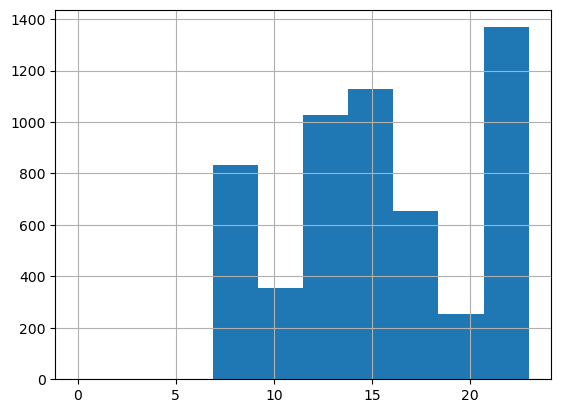

<Axes: >

dep_day


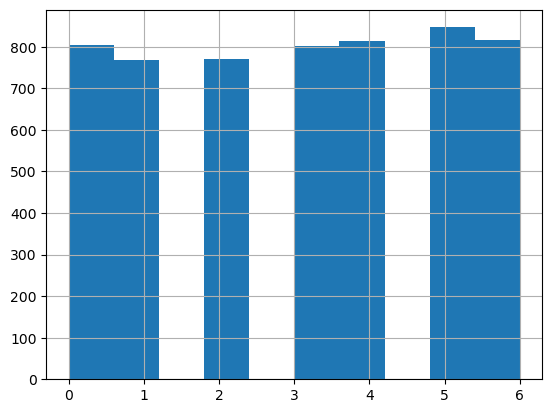

<Axes: >

Origin_Airport


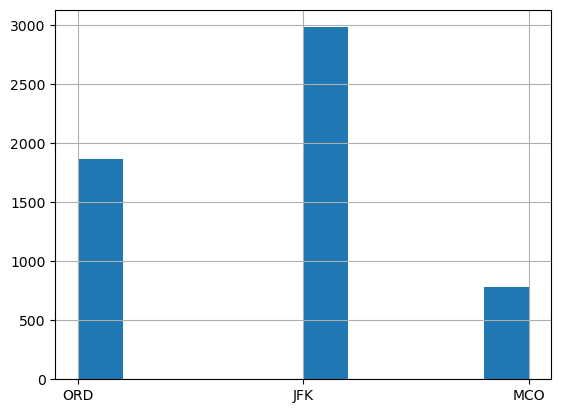

<Axes: >

arr_hour


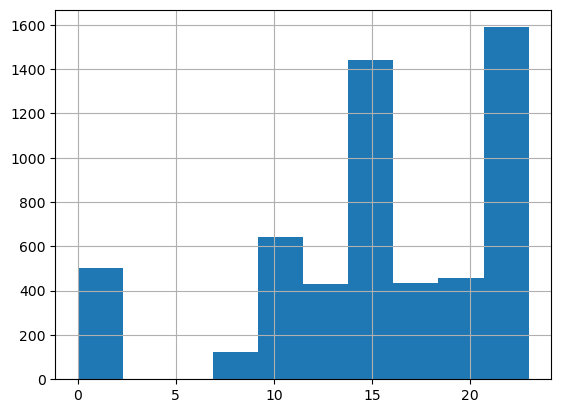

<Axes: >

arr_day


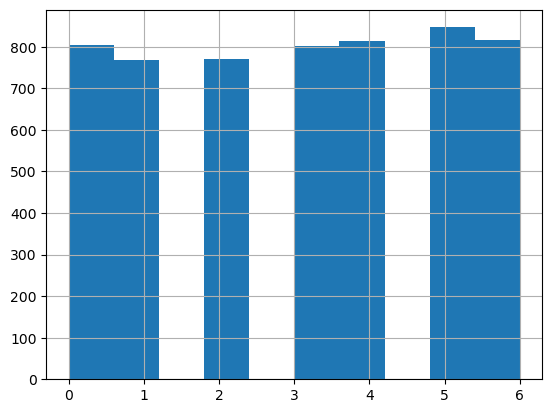

<Axes: >

dep_min


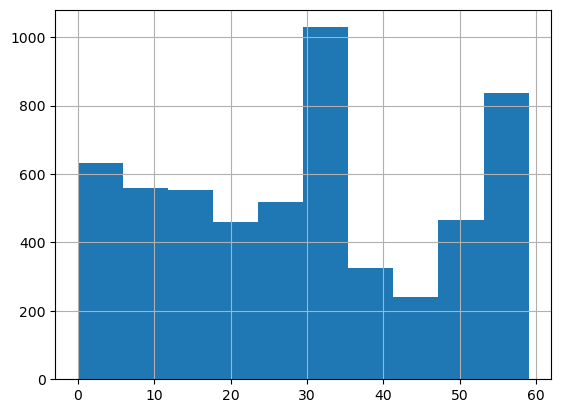

<Axes: >

arr_min


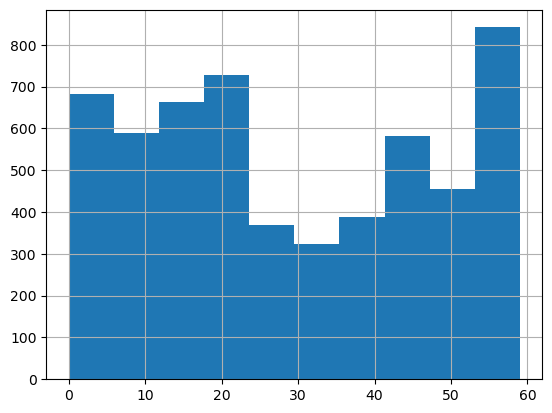

<Axes: >

arr_status


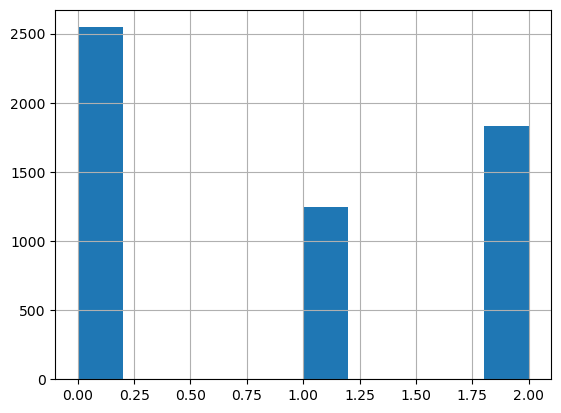

<Axes: >

arr_clouds


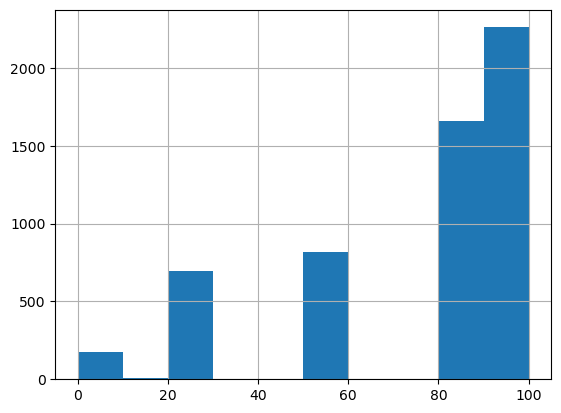

<Axes: >

arr_dewpt


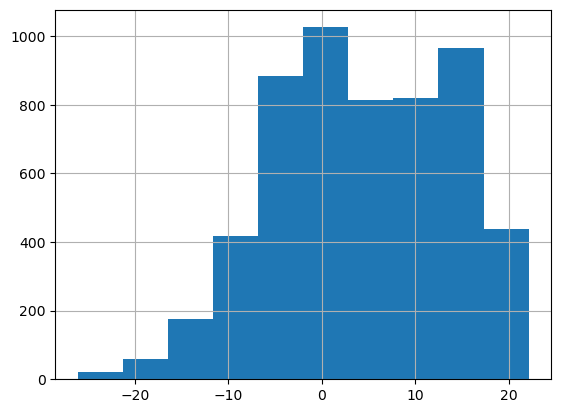

<Axes: >

arr_precip


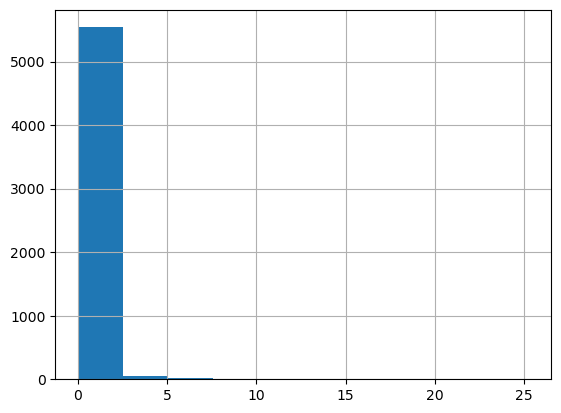

<Axes: >

arr_pres


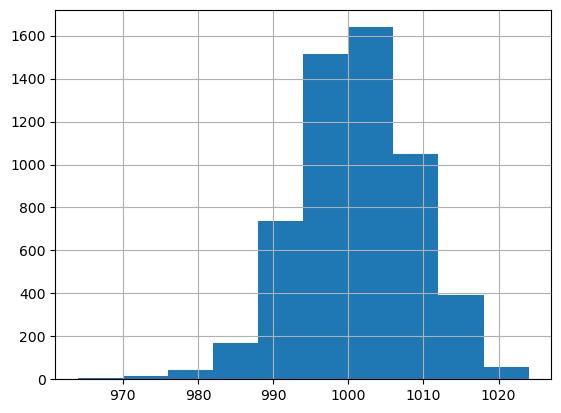

<Axes: >

arr_rh


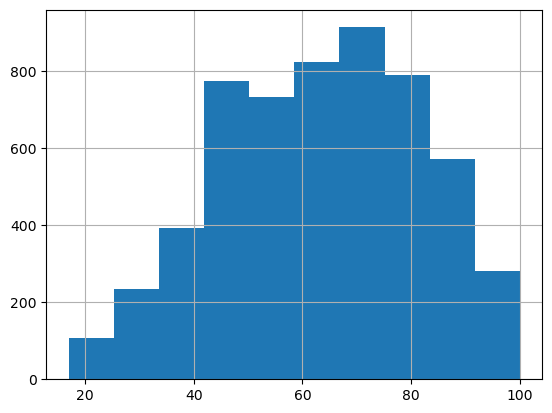

<Axes: >

arr_snow


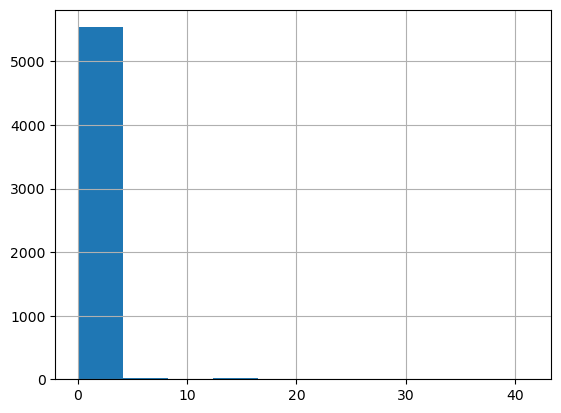

<Axes: >

arr_temp


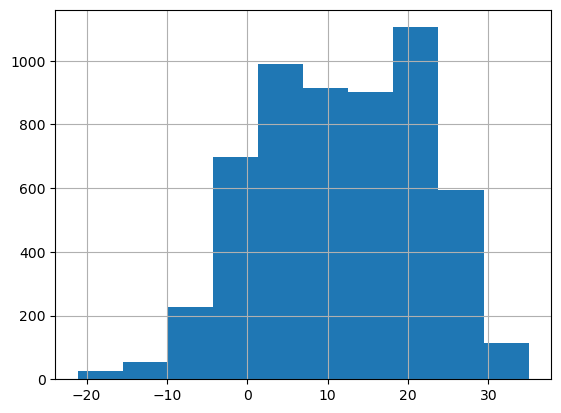

<Axes: >

arr_vis


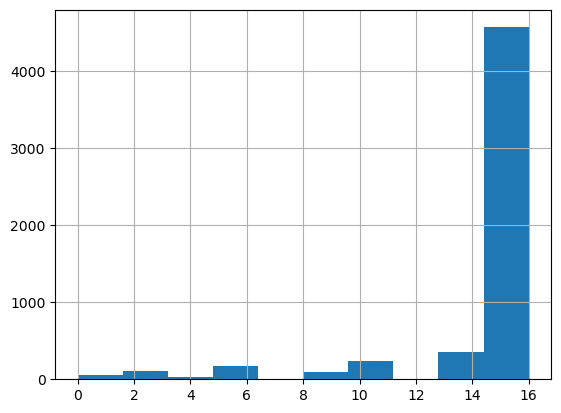

<Axes: >

arr_weather.code


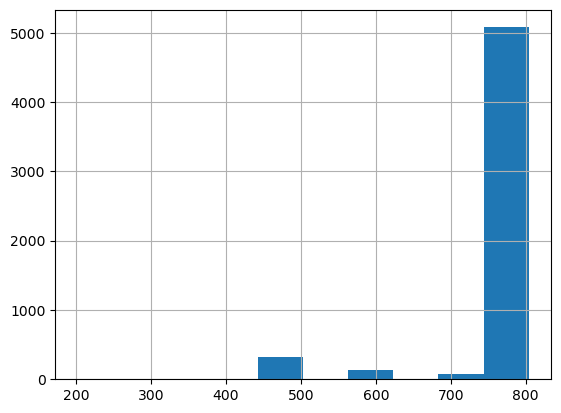

<Axes: >

arr_wind_dir


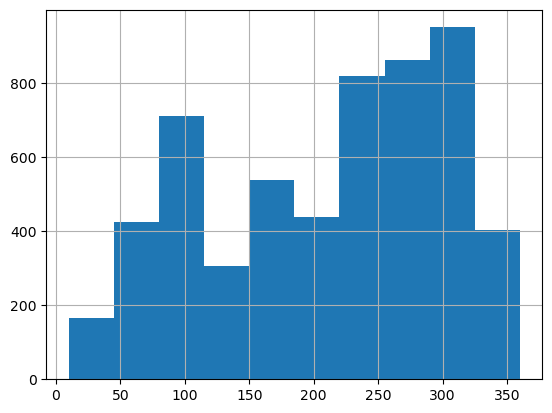

<Axes: >

arr_wind_gust_spd


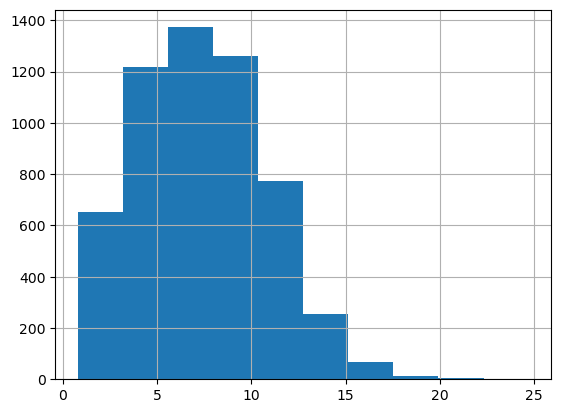

<Axes: >

arr_wind_spd


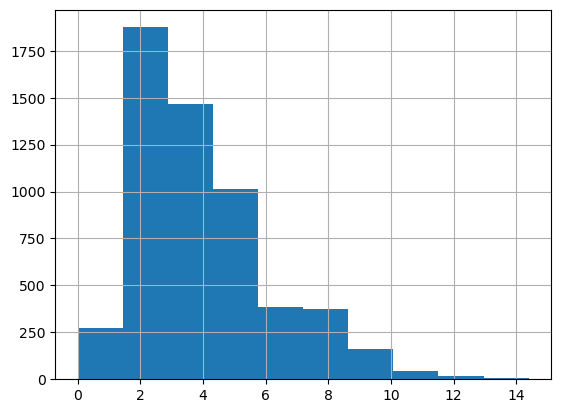

<Axes: >

dep_clouds


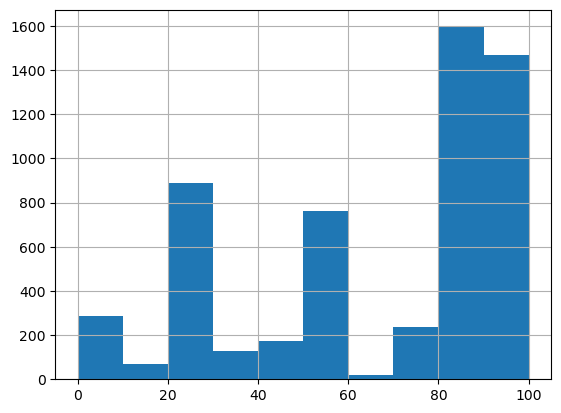

<Axes: >

dep_dewpt


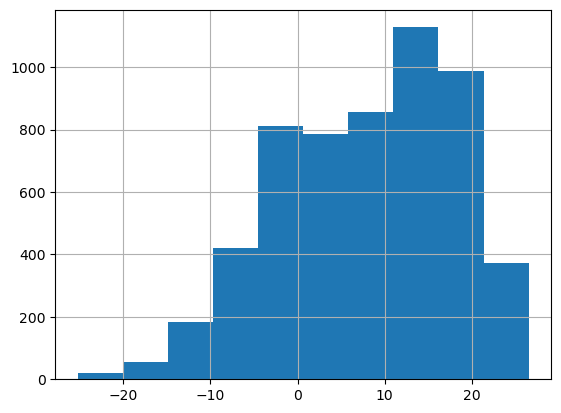

<Axes: >

dep_precip


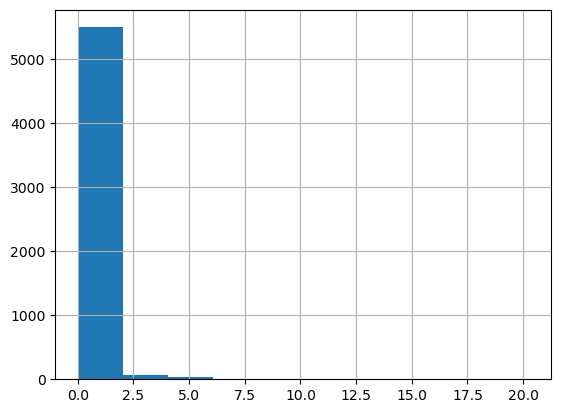

<Axes: >

dep_pres


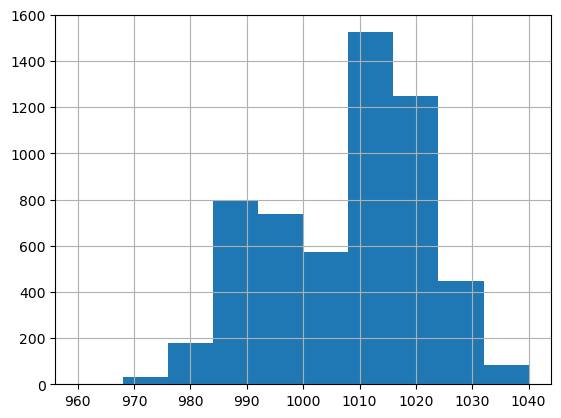

<Axes: >

dep_rh


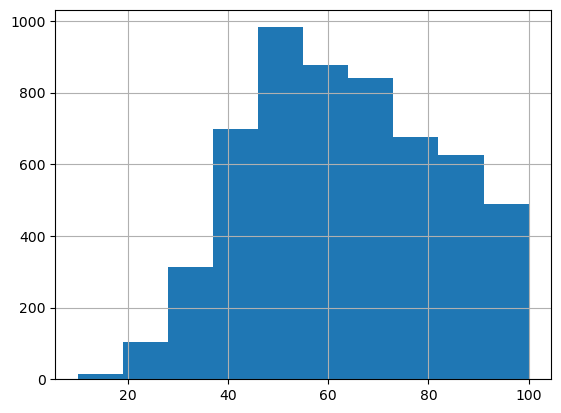

<Axes: >

dep_snow


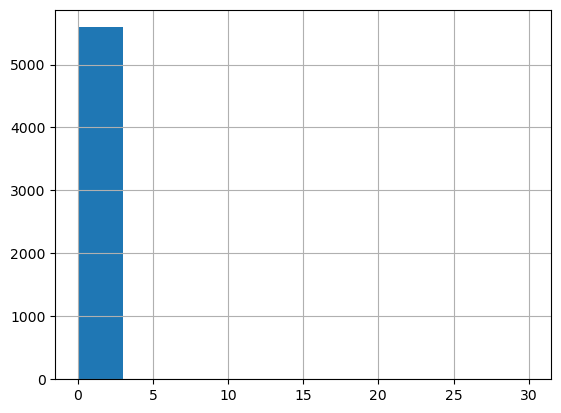

<Axes: >

dep_temp


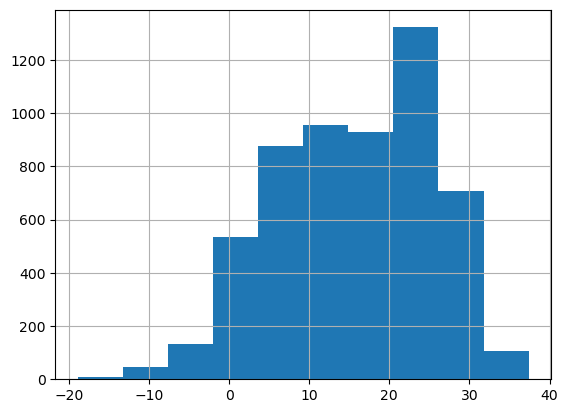

<Axes: >

dep_vis


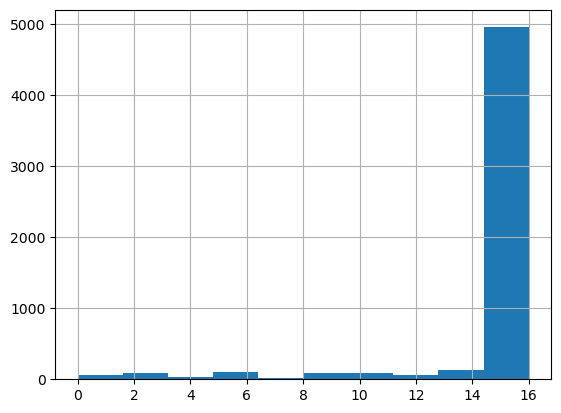

<Axes: >

dep_weather.code


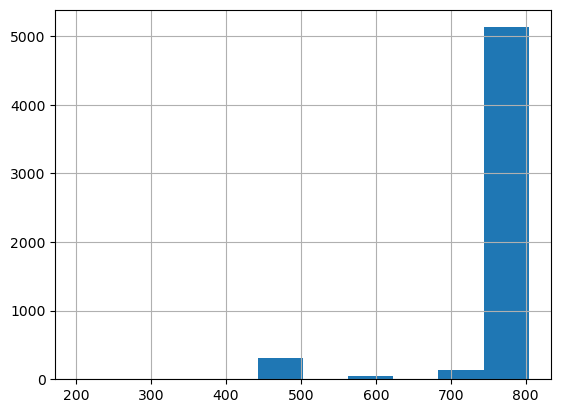

<Axes: >

dep_wind_dir


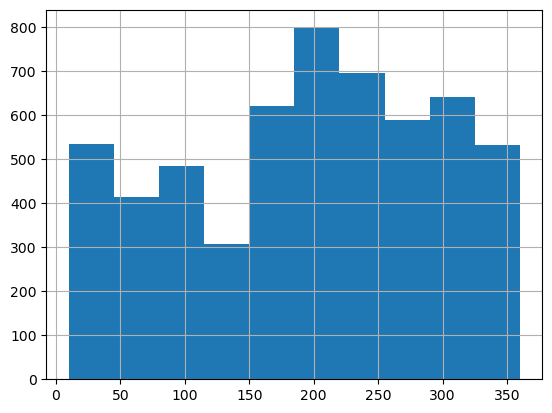

<Axes: >

dep_wind_gust_spd


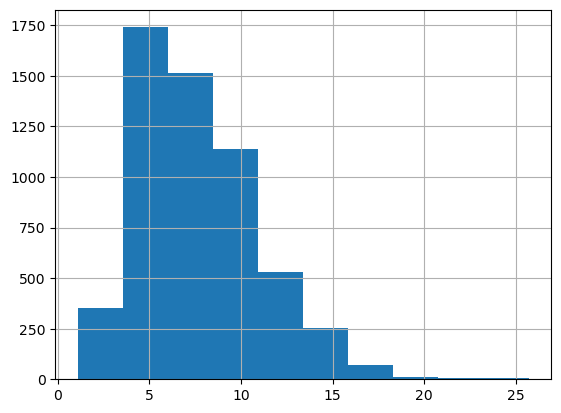

<Axes: >

dep_wind_spd


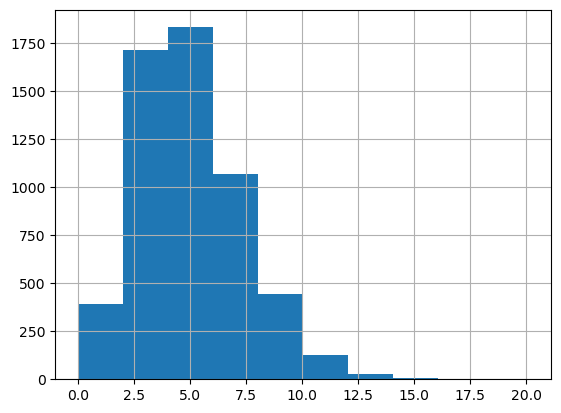

In [45]:
cols = sub_data.columns
print(cols)
for col in cols: 
    sub_data[col].hist()
    print(col)
    plt.show()

In [46]:
import plotly.express as px

In [47]:
sub_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'arr_clouds', 'arr_dewpt',
       'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis',
       'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd',
       'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh',
       'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code', 'dep_wind_dir',
       'dep_wind_gust_spd', 'dep_wind_spd'],
      dtype='object')

In [48]:
#for co in sub_data.columns:
fig = px.scatter(sub_data, y='dep_precip', x='arr_status', title='delay Over columns')
#fig.update_layout(height=1600, width=900, title_text="Stacked Subplots")
fig.show()

In [49]:
#sub_data['Carrier_Code'].unique()

In [50]:
# sub_data["Carrier_Code"] = np.where(sub_data["Carrier_Code"] == "MQ", "AA", sub_data["Carrier_Code"])
# sub_data["Carrier_Code"] = np.where(sub_data["Carrier_Code"] == "9E", "DL", sub_data["Carrier_Code"])

In [51]:
sub_data['Origin_Airport'].unique()

array(['ORD', 'JFK', 'MCO'], dtype=object)

In [52]:
su_data = sub_data
# su_data.head()
# sub_data.columns
su_data['dep_hour'] = pd.Categorical(su_data['dep_hour'], categories=[i for i in range(24)])
su_data['dep_day'] = pd.Categorical(su_data['dep_day'], categories=[i for i in range(7)])
su_data['dep_min'] = pd.Categorical(su_data['dep_min'], categories=[i for i in range(60)])
su_data['arr_hour'] = pd.Categorical(su_data['arr_hour'], categories=[i for i in range(24)])
su_data['arr_day'] = pd.Categorical(su_data['arr_day'], categories=[i for i in range(7)])
su_data['arr_min'] = pd.Categorical(su_data['arr_min'], categories=[i for i in range(60)])
#su_data['Carrier_Code'] = pd.Categorical(su_data['Carrier_Code'], categories=['AA', 'UA', 'DL', 'B6', 'WN'])
su_data['Origin_Airport'] = pd.Categorical(su_data['Origin_Airport'], categories=['ORD', 'JFK', 'MCO'])
su_data['arr_weather.code'] = pd.Categorical(su_data['arr_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
su_data['dep_weather.code'] = pd.Categorical(su_data['dep_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])

#su_data.drop(columns=['arr_h_angle','dep_h_angle'],inplace = True)
su_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'arr_clouds', 'arr_dewpt',
       'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis',
       'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd',
       'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh',
       'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code', 'dep_wind_dir',
       'dep_wind_gust_spd', 'dep_wind_spd'],
      dtype='object')

In [53]:
sub_data['dep_precip'] = sub_data['dep_precip']**2
sub_data['arr_precip'] = sub_data['arr_precip']**2

In [54]:
# correl = subset_data.corr()
correl = su_data.corr(numeric_only=True)

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

In [55]:
dep_data = pd.read_csv('departures.csv')

In [56]:
dep_data.head(10)
len(dep_data)
dep_data.dtypes

,Unnamed: 0,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport
0,0,G4,01/02/2020,1737,241NV,SYR,06:30,06:29,176,167,-1,06:42,13,0,0,0,0,0,FLL
1,1,G4,01/03/2019,1720,226NV,SYR,06:50,06:49,182,167,-1,07:01,12,0,0,0,0,0,FLL
2,2,G4,01/03/2021,1744,245NV,SYR,16:25,17:40,178,168,75,17:53,13,0,0,0,0,65,FLL
3,3,G4,01/03/2022,962,222NV,SYR,06:15,06:15,176,175,0,06:30,15,0,0,0,0,0,FLL
4,4,G4,01/03/2023,523,234NV,SYR,06:30,10:34,182,170,244,10:51,17,232,0,0,0,0,FLL
5,5,G4,01/04/2020,2662,222NV,SYR,13:05,13:25,181,223,20,14:42,77,0,0,42,0,20,FLL
6,6,G4,01/04/2021,1772,245NV,SYR,15:58,21:23,178,171,325,21:33,10,0,0,131,0,187,FLL
7,7,G4,01/05/2020,1737,241NV,SYR,06:30,07:05,176,179,35,07:19,14,0,0,38,0,0,FLL
8,8,G4,01/06/2019,1720,216NV,SYR,06:50,07:04,182,197,14,07:21,17,0,0,29,0,0,FLL
9,9,G4,01/06/2023,524,232NV,SYR,15:05,15:05,187,199,0,15:38,33,0,0,0,0,0,FLL


56542

Unnamed: 0                                   int64
Carrier Code                                object
Date (MM/DD/YYYY)                           object
Flight Number                                int64
Tail Number                                 object
Destination Airport                         object
Scheduled departure time                    object
Actual departure time                       object
Scheduled elapsed time (Minutes)             int64
Actual elapsed time (Minutes)                int64
Departure delay (Minutes)                    int64
Wheels-off time                             object
Taxi-Out time (Minutes)                      int64
Delay Carrier (Minutes)                      int64
Delay Weather (Minutes)                      int64
Delay National Aviation System (Minutes)     int64
Delay Security (Minutes)                     int64
Delay Late Aircraft Arrival (Minutes)        int64
Origin Airport                              object
dtype: object

In [57]:
dep_data['Destination Airport'].value_counts()

Destination Airport
SYR    56542
Name: count, dtype: int64

In [58]:
dep_data['Carrier Code'].value_counts()

Carrier Code
9E    9916
YX    6173
DL    5337
B6    5294
AA    5266
OO    4934
OH    4109
G4    3444
UA    3052
MQ    2594
WN    2499
F9    2251
YV    1218
EV     455
Name: count, dtype: int64

In [59]:
dep_data['Origin Airport'].value_counts()

Origin Airport
ORD    8138
JFK    6618
DTW    5731
CLT    5617
ATL    4442
DCA    3856
LGA    3758
MCO    2707
BWI    2261
EWR    1923
IAD    1786
DEN    1579
PHL    1556
BOS    1002
PIE     898
DFW     864
FLL     699
SFB     579
BNA     562
SRQ     400
RSW     304
TPA     281
MSP     256
PGD     242
RDU     205
MYR     171
MIA     100
ALB       6
GSP       1
Name: count, dtype: int64

In [60]:
arr_data = pd.read_csv('arrivals.csv')

In [61]:
arr_data.head(10)
len(arr_data)
arr_data.dtypes
arr_data.columns

,Unnamed: 0,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Destination Airport
0,0,UA,01/01/2022,1282,N4901U,IAD,23:10,00:01,70,76,51,23:55,6,23,0,6,0,22,SYR
1,1,UA,01/01/2023,604,N814UA,DEN,14:58,14:52,193,177,-6,14:48,4,0,0,0,0,0,SYR
2,2,UA,01/01/2023,2488,N38458,EWR,23:14,23:15,75,62,1,23:10,5,0,0,0,0,0,SYR
3,3,UA,01/01/2023,2645,N23721,ORD,23:57,23:47,107,100,-10,23:41,6,0,0,0,0,0,SYR
4,4,UA,01/02/2022,1282,N4901U,IAD,23:10,23:27,70,64,17,23:19,8,17,0,0,0,0,SYR
5,5,UA,01/02/2023,604,N890UA,DEN,15:01,17:36,193,217,155,17:31,5,40,0,24,0,91,SYR
6,6,UA,01/02/2023,1968,N23708,IAD,23:12,23:39,72,73,27,23:35,4,0,0,1,0,26,SYR
7,7,UA,01/02/2023,1998,N802UA,ORD,21:07,20:46,113,89,-21,20:43,3,0,0,0,0,0,SYR
8,8,UA,01/03/2022,1282,N893UA,IAD,23:10,23:31,70,68,21,23:25,6,21,0,0,0,0,SYR
9,9,UA,01/03/2023,604,N813UA,DEN,14:58,14:52,193,181,-6,14:46,6,0,0,0,0,0,SYR


69508

Unnamed: 0                                   int64
Carrier Code                                object
Date (MM/DD/YYYY)                           object
Flight Number                                int64
Tail Number                                 object
Origin Airport                              object
Scheduled Arrival Time                      object
Actual Arrival Time                         object
Scheduled Elapsed Time (Minutes)             int64
Actual Elapsed Time (Minutes)                int64
Arrival Delay (Minutes)                      int64
Wheels-on Time                              object
Taxi-In time (Minutes)                       int64
Delay Carrier (Minutes)                      int64
Delay Weather (Minutes)                      int64
Delay National Aviation System (Minutes)     int64
Delay Security (Minutes)                     int64
Delay Late Aircraft Arrival (Minutes)        int64
Destination Airport                         object
dtype: object

Index(['Unnamed: 0', 'Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number',
       'Tail Number', 'Origin Airport', 'Scheduled Arrival Time',
       'Actual Arrival Time', 'Scheduled Elapsed Time (Minutes)',
       'Actual Elapsed Time (Minutes)', 'Arrival Delay (Minutes)',
       'Wheels-on Time', 'Taxi-In time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Destination Airport'],
      dtype='object')

In [62]:
arr_data = arr_data[['Carrier Code', 'Date (MM/DD/YYYY)', 'Origin Airport', 'Scheduled Arrival Time',
       'Actual Arrival Time', 'Arrival Delay (Minutes)','Destination Airport']]
arr_data.head()

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Arrival Delay (Minutes),Destination Airport
0,UA,01/01/2022,IAD,23:10,00:01,51,SYR
1,UA,01/01/2023,DEN,14:58,14:52,-6,SYR
2,UA,01/01/2023,EWR,23:14,23:15,1,SYR
3,UA,01/01/2023,ORD,23:57,23:47,-10,SYR
4,UA,01/02/2022,IAD,23:10,23:27,17,SYR


In [63]:
arr_data['Origin Airport'].value_counts()

Origin Airport
ORD    10577
JFK    10350
DTW     9455
LGA     6219
CLT     5617
ATL     4442
DCA     3909
MCO     2707
EWR     2344
BWI     2261
IAD     1800
DEN     1579
PHL     1556
BOS     1002
DFW      971
PIE      898
FLL      699
SFB      579
BNA      562
SRQ      400
RSW      304
TPA      281
MSP      256
PGD      242
RDU      205
MYR      171
MIA      115
ALB        6
GSP        1
Name: count, dtype: int64

In [64]:
arr_data['Origin Airport'].value_counts()

Origin Airport
ORD    10577
JFK    10350
DTW     9455
LGA     6219
CLT     5617
ATL     4442
DCA     3909
MCO     2707
EWR     2344
BWI     2261
IAD     1800
DEN     1579
PHL     1556
BOS     1002
DFW      971
PIE      898
FLL      699
SFB      579
BNA      562
SRQ      400
RSW      304
TPA      281
MSP      256
PGD      242
RDU      205
MYR      171
MIA      115
ALB        6
GSP        1
Name: count, dtype: int64

In [65]:
check = arr_data[arr_data['Origin Airport'] == 'MCO']

In [66]:
check['arr_year'] = arr_data['Date (MM/DD/YYYY)'].str.split("/").str[2].astype('object')

C:\Users\gurud\AppData\Local\Temp\ipykernel_38336\1900877023.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
check.head()

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Arrival Delay (Minutes),Destination Airport,arr_year
8389,F9,01/01/2019,MCO,15:27,15:04,-23,SYR,2019
8393,F9,01/01/2020,MCO,14:39,14:23,-16,SYR,2020
8394,F9,01/01/2021,MCO,17:04,17:04,0,SYR,2021
8397,F9,01/01/2022,MCO,19:47,22:38,171,SYR,2022
8400,F9,01/02/2021,MCO,17:04,16:35,-29,SYR,2021


In [68]:
check1 = check[check['arr_year'] == '2023']

In [69]:
check1['Carrier Code'].value_counts()

Carrier Code
B6    341
F9    281
WN    128
Name: count, dtype: int64

In [70]:
arr_data['arr_hour'] = arr_data['Scheduled Arrival Time'].str.split(":").str[0].astype('int64')
arr_data.rename(columns = {'Date (MM/DD/YYYY)':'Date'},inplace = True)
#arr_data['Date'] = pd.to_datetime( arr_data['Date (MM/DD/YYYY)'],format ="%m/%d/%Y")
arr_data.head()

,Carrier Code,Date,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Arrival Delay (Minutes),Destination Airport,arr_hour
0,UA,01/01/2022,IAD,23:10,00:01,51,SYR,23
1,UA,01/01/2023,DEN,14:58,14:52,-6,SYR,14
2,UA,01/01/2023,EWR,23:14,23:15,1,SYR,23
3,UA,01/01/2023,ORD,23:57,23:47,-10,SYR,23
4,UA,01/02/2022,IAD,23:10,23:27,17,SYR,23


In [71]:
arr_data['arr_hour'].value_counts()

arr_hour
23    9988
11    8537
16    6145
17    5853
22    5420
18    4530
10    4156
12    3133
21    3054
14    2860
13    2860
0     2857
15    2512
9     2330
19    2037
8     1722
20    1474
7       20
24      13
3        3
2        3
1        1
Name: count, dtype: int64

In [72]:
result = arr_data.groupby(['Date', 'arr_hour']).size().reset_index(name='count')

In [73]:
result.head()
len(result)

,Date,arr_hour,count
0,01/01/2019,0,4
1,01/01/2019,7,1
2,01/01/2019,10,3
3,01/01/2019,11,8
4,01/01/2019,13,1


23856

In [74]:
result.to_csv('arr_traffic.csv')

In [75]:
arr_data['Destination Airport'].value_counts()

Destination Airport
SYR    69508
Name: count, dtype: int64

In [76]:
arr_data['Carrier Code'].value_counts()

Carrier Code
9E    19832
YX     6173
DL     5337
B6     5294
AA     5266
MQ     5188
OO     4935
OH     4109
G4     3444
UA     3052
WN     2499
F9     2251
YV     1218
EV      910
Name: count, dtype: int64

In [77]:
arr_data['Origin Airport'].value_counts()

Origin Airport
ORD    10577
JFK    10350
DTW     9455
LGA     6219
CLT     5617
ATL     4442
DCA     3909
MCO     2707
EWR     2344
BWI     2261
IAD     1800
DEN     1579
PHL     1556
BOS     1002
DFW      971
PIE      898
FLL      699
SFB      579
BNA      562
SRQ      400
RSW      304
TPA      281
MSP      256
PGD      242
RDU      205
MYR      171
MIA      115
ALB        6
GSP        1
Name: count, dtype: int64

In [78]:
f_data = pd.read_csv('weather_arrivals_departures_merged.csv')

In [79]:
f_data.head(10)
len(f_data)
f_data.dtypes

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Taxi-In time (Minutes),Delay Carrier (Minutes)_x,...,temp_y,uv_y,vis_y,weather.code_y,wind_gust_spd_y,wind_spd_y,timestamp_local_y,snow_rate_y,key_y,date_time_map_y
0,B6,01/01/2020,116,JFK,08:22,75,62,-14,3,0,...,2.80,0.00,16,804,11.10,7.70,2020-01-01 07:00:00,0.00,JFK,2020-01-01 07:00:00
1,OO,01/01/2020,3247,ORD,10:43,113,110,-3,4,0,...,-6.10,1.00,16,802,6.60,4.59,2020-01-01 07:45:00,0.00,ORD,2020-01-01 07:45:00
2,9E,01/01/2020,5066,JFK,11:37,92,72,-34,5,0,...,3.90,0.70,16,804,11.60,7.70,2020-01-01 10:00:00,0.00,JFK,2020-01-01 10:00:00
3,F9,01/01/2020,1214,MCO,14:39,164,156,-16,6,0,...,18.30,4.00,16,802,5.20,3.10,2020-01-01 12:00:00,0.00,MCO,2020-01-01 12:00:00
4,OO,01/01/2020,3253,ORD,14:43,113,110,-5,5,0,...,1.70,1.80,16,802,10.80,5.09,2020-01-01 11:45:00,0.00,ORD,2020-01-01 11:45:00
5,OO,01/01/2020,3241,ORD,17:52,112,97,-21,6,0,...,5.00,0.80,16,803,12.70,6.45,2020-01-01 15:00:00,0.00,ORD,2020-01-01 15:00:00
6,YX,01/01/2020,5957,JFK,18:02,93,68,-27,4,0,...,3.50,0.50,16,804,11.60,8.19,2020-01-01 16:30:00,0.00,JFK,2020-01-01 16:30:00
7,B6,01/01/2020,2516,JFK,20:50,80,71,-19,4,0,...,2.80,0.00,16,803,11.20,7.53,2020-01-01 19:30:00,0.00,JFK,2020-01-01 19:30:00
8,AA,01/01/2020,2877,ORD,21:43,109,107,-4,4,0,...,4.50,0.00,16,804,12.50,7.20,2020-01-01 19:00:00,0.00,ORD,2020-01-01 19:00:00
9,B6,01/01/2020,656,MCO,21:55,159,161,0,3,0,...,16.90,0.00,16,802,2.50,2.02,2020-01-01 19:15:00,0.00,MCO,2020-01-01 19:15:00


12340

Carrier Code               object
Date (MM/DD/YYYY)          object
Flight Number               int64
Origin Airport             object
Scheduled Arrival Time     object
                           ...   
wind_spd_y                float64
timestamp_local_y          object
snow_rate_y               float64
key_y                      object
date_time_map_y            object
Length: 61, dtype: object

In [80]:
f_data['Carrier Code'].value_counts()

Carrier Code
B6    3090
9E    2682
MQ    1555
OO    1427
YX    1276
UA    1152
F9     880
WN     182
AA      96
Name: count, dtype: int64

In [81]:
f_data['Origin Airport'].value_counts()

Origin Airport
ORD    5351
JFK    4827
MCO    2162
Name: count, dtype: int64

In [82]:
mco_syr_sw_data1 = pd.read_csv('flight_data\mco_syr_sw_dep_22_23.csv')
mco_syr_jb_data1 = pd.read_csv('flight_data\mco_syr_jb_dep_22_23.csv')
mco_syr_sw_data1['Origin_Airport'] = 'MCO'
mco_syr_jb_data1['Origin_Airport'] = 'MCO'
jfk_syr_jb_data1 = pd.read_csv('flight_data\jfk_syr_jb_dep_22_23.csv')
jfk_syr_end_data1 = pd.read_csv('flight_data\jfk_syr_end_dep_22_23.csv')
jfk_syr_jb_data1['Origin_Airport'] = 'JFK'
jfk_syr_end_data1['Origin_Airport'] = 'JFK'
ord_syr_ua_data1 = pd.read_csv('flight_data\ord_syr_ua_dep_22_23.csv')
ord_syr_aa_data1 = pd.read_csv('flight_data\ord_syr_aa_dep_22_23.csv')
ord_syr_ua_data1['Origin_Airport'] = 'ORD'
ord_syr_aa_data1['Origin_Airport'] = 'ORD'

In [83]:
dfs1 = [ord_syr_aa_data1,ord_syr_ua_data1,jfk_syr_end_data1,jfk_syr_jb_data1,mco_syr_jb_data1,mco_syr_sw_data1]
main_data1 = pd.concat(dfs1,axis = 0)
main_data1.head()
len(main_data1)

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin_Airport
0,MQ,1/1/2022,3525,N610AE,TOL,8:58,8:48,65,82,-10,9:31,43,0,0,0,0,0,ORD
1,MQ,1/1/2022,3532,N922AE,MHK,17:35,0:00,112,0,0,0:00,0,0,0,0,0,0,ORD
2,MQ,1/1/2022,3541,N610AE,CWA,17:35,0:00,70,0,0,0:00,0,0,0,0,0,0,ORD
3,MQ,1/1/2022,3548,N610AE,TOL,14:04,0:00,64,0,0,0:00,0,0,0,0,0,0,ORD
4,MQ,1/1/2022,3556,N298FR,CMH,18:10,19:38,93,99,88,20:07,29,0,88,6,0,0,ORD


466681

In [84]:
main_data1 = main_data1[[ 'Date (MM/DD/YYYY)', 'Scheduled departure time','Destination Airport','Origin_Airport']]
main_data1.head()
main_data1.dtypes

,Date (MM/DD/YYYY),Scheduled departure time,Destination Airport,Origin_Airport
0,1/1/2022,8:58,TOL,ORD
1,1/1/2022,17:35,MHK,ORD
2,1/1/2022,17:35,CWA,ORD
3,1/1/2022,14:04,TOL,ORD
4,1/1/2022,18:10,CMH,ORD


Date (MM/DD/YYYY)           object
Scheduled departure time    object
Destination Airport         object
Origin_Airport              object
dtype: object

In [85]:
main_data1['dep_hour'] = main_data1['Scheduled departure time'].str.split(":").str[0].astype('int64')
main_data1.rename(columns = {'Date (MM/DD/YYYY)':'Date'},inplace = True)
#arr_data['Date'] = pd.to_datetime( arr_data['Date (MM/DD/YYYY)'],format ="%m/%d/%Y")
main_data1.head()

,Date,Scheduled departure time,Destination Airport,Origin_Airport,dep_hour
0,1/1/2022,8:58,TOL,ORD,8
1,1/1/2022,17:35,MHK,ORD,17
2,1/1/2022,17:35,CWA,ORD,17
3,1/1/2022,14:04,TOL,ORD,14
4,1/1/2022,18:10,CMH,ORD,18


In [86]:
result1 = main_data1.groupby(['Origin_Airport','Date', 'dep_hour']).size().reset_index(name='count')

In [87]:
result1.head()
len(result)

,Origin_Airport,Date,dep_hour,count
0,JFK,1/1/2022,5,2
1,JFK,1/1/2022,6,8
2,JFK,1/1/2022,7,4
3,JFK,1/1/2022,8,12
4,JFK,1/1/2022,9,11


23856

In [88]:
result1.to_csv('dep_traffic.csv')

In [89]:
su_data = pd.get_dummies(su_data, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
su_data.head()
su_data.dtypes
su_data.columns

,arr_status,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_wind_dir,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
0,1,100,6.00,1.56,991,95,0.00,6.70,10,300,...,False,False,False,False,False,False,False,False,False,False
1,0,100,1.60,0.00,1001,85,0.00,3.90,13,300,...,False,False,False,False,False,False,False,False,True,False
2,0,100,1.70,0.00,999,79,0.00,5.00,13,250,...,False,False,False,False,False,False,False,False,True,False
3,2,100,-6.20,0.00,994,91,0.00,-5.00,8,280,...,False,False,False,False,False,False,False,False,True,False
4,2,100,-5.60,0.00,1003,91,0.00,-4.40,16,340,...,False,False,False,False,False,False,True,False,False,False


arr_status                int32
arr_clouds                int64
arr_dewpt               float64
arr_precip              float64
arr_pres                  int64
                         ...   
dep_weather.code_801       bool
dep_weather.code_802       bool
dep_weather.code_803       bool
dep_weather.code_804       bool
dep_weather.code_900       bool
Length: 271, dtype: object

Index(['arr_status', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_wind_dir',
       ...
       'dep_weather.code_721', 'dep_weather.code_731', 'dep_weather.code_741',
       'dep_weather.code_751', 'dep_weather.code_800', 'dep_weather.code_801',
       'dep_weather.code_802', 'dep_weather.code_803', 'dep_weather.code_804',
       'dep_weather.code_900'],
      dtype='object', length=271)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(su_data.drop(columns = ['arr_status']), su_data['arr_status'],stratify = su_data['arr_status'], test_size=0.2, random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train.dtypes
y_test

,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_wind_dir,arr_wind_gust_spd,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
5487,25,4.10,0.00,998,39,0.00,18.30,16,270,9.30,...,False,False,False,False,False,False,False,False,True,False
2914,0,16.70,0.00,999,87,0.00,18.90,16,140,2.00,...,False,False,True,False,False,False,False,False,False,False
451,87,18.80,0.00,996,81,0.00,22.20,16,270,6.80,...,False,False,False,False,False,False,False,False,True,False
1322,50,11.50,0.00,1006,49,0.00,22.80,16,110,5.20,...,False,False,False,False,True,False,False,False,False,False
5504,87,12.20,0.00,1002,42,0.00,26.10,16,290,6.80,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,50,17.60,0.00,988,83,0.00,20.60,16,240,6.40,...,False,False,False,False,False,False,False,False,False,False
2568,25,4.70,0.00,1006,27,0.00,25.00,16,290,7.20,...,False,False,False,False,False,False,False,True,False,False
4128,100,7.80,0.00,993,62,0.00,15.00,16,310,4.40,...,False,False,False,False,False,False,False,False,True,False
4887,100,-9.40,0.25,993,81,12.50,-6.70,4,100,5.60,...,False,False,False,False,False,False,False,False,True,False


,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_wind_dir,arr_wind_gust_spd,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
4979,50,-5.00,0.00,1010,43,0.00,6.70,16,180,7.70,...,False,False,False,False,False,False,True,False,False,False
4823,50,1.60,0.00,1010,92,0.00,2.80,13,70,7.60,...,False,False,True,False,False,False,False,False,False,False
4796,100,-2.90,0.00,1014,69,0.00,2.20,16,260,5.60,...,False,False,False,False,False,False,True,False,False,False
1676,25,7.50,0.00,1007,40,0.00,21.70,16,260,5.60,...,False,False,False,False,False,False,False,False,False,False
5619,100,5.00,0.00,988,100,0.00,5.00,2,270,7.60,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,87,10.60,0.00,1001,46,0.00,22.80,16,335,5.60,...,False,False,False,False,False,False,True,False,False,False
1150,50,-5.10,0.00,1001,48,0.00,5.00,16,250,3.60,...,False,False,False,False,False,False,False,False,True,False
1129,50,3.10,0.00,1003,67,0.00,8.90,16,60,3.20,...,False,False,False,False,False,False,False,True,False,False
474,87,15.00,0.00,999,78,0.00,18.90,16,350,4.40,...,False,False,False,False,False,False,False,False,True,False


dtype('int32')

4979    2
4823    2
4796    0
1676    0
5619    0
       ..
481     0
1150    0
1129    2
474     1
4217    1
Name: arr_status, Length: 1125, dtype: int32

In [ ]:
# y = X_train['arr_status']
# u = X_test['arr_status']
# X_train.drop(columns=['arr_status'], inplace=True)
# X_test.drop(columns=['arr_status'], inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)
X_train
X_test
y_train
y_test

In [36]:
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'none', max_iter = 1000)
model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = None, max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'multinomial', penalty = None, max_iter = 1000)
#model = LinearRegression(fit_intercept = True)
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 10000)

# While using multiclass case do multi_class = 'ovr' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
model.coef_

# This is the coefficient Beta_0
model.intercept_

LogisticRegression(max_iter=1000, multi_class='ovr')

0.5760337927967986

array([[ 4.97469257e-01,  6.80498625e-02, -2.34592772e-01,
        -6.64581737e-02, -2.44170937e-01,  1.37838280e-02,
        -6.36382757e-02,  1.31094147e-01, -9.55490578e-02,
        -1.61766882e-02, -9.43769530e-02, -2.37556149e-01,
         5.06800866e-01, -4.94289985e-01,  9.54684130e-02,
        -3.61869411e-01, -1.63904780e-01, -6.00110864e-01,
         6.07681170e-02, -7.89124886e-02, -2.92201370e-01,
         7.11175848e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.40271905e-02,  4.45221920e-01,
         4.51454821e-01,  2.18892674e-01,  9.97934117e-02,
         2.37831595e-01,  4.38243721e-02,  7.48091883e-02,
        -1.01718179e-01, -6.76142554e-02,  8.42583314e-03,
        -5.64452969e-02, -2.30685436e-01, -6.62643191e-02,
        -2.66868187e-01, -5.12958674e-01, -1.57386917e-01,
         5.44299742e-02,  7.59833073e-02,  5.64648371e-02,
         2.25320655e-04,  2.39003423e-02,  3.22603544e-0

array([-0.2686218 , -1.37741243, -0.89501624])

In [37]:
model.score(X_test,y_test)


0.5217777777777778

In [38]:
linear_reg_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
linear_reg_output.head(20)
# mean_absolute_error = abs(linear_reg_output['pred_delay'] - linear_reg_output['arr_delay']).mean()
# print('Mean absolute error is ')
# print(mean_absolute_error)
# maer = mean_absolute_error/linear_reg_output['pred_delay'].mean()
# print('Mean absolute error ratio is ')
# print(maer)
model.score(X_test, y_test)

,pred_arr_status,arr_status
4979,0,2
4823,2,2
4796,0,0
1676,0,0
5619,2,0
2800,0,1
1844,0,2
2037,2,0
4406,1,2
3978,2,2


0.5217777777777778

In [39]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeClassifier(random_state=50, min_samples_leaf = 3)

clf = clf.fit(X_train, y_train) 
clf.score(X_train, y_train)

clf.feature_importances_
linear_reg_output = pd.DataFrame(clf.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
linear_reg_output.head(20)
clf.score(X_test, y_test)

0.8517118719430858

array([0.01457765, 0.04578132, 0.00529726, 0.04431854, 0.06165009,
       0.        , 0.04007447, 0.0115071 , 0.06263656, 0.05038597,
       0.04364244, 0.02149175, 0.05644307, 0.00554177, 0.05503006,
       0.0576594 , 0.        , 0.05008441, 0.01728538, 0.04960786,
       0.04983577, 0.05283885, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00357776, 0.00078198, 0.00128738, 0.00186941, 0.0062558 ,
       0.00305882, 0.00242608, 0.00303601, 0.00168946, 0.00209143,
       0.        , 0.        , 0.00246943, 0.00698385, 0.        ,
       0.00132975, 0.00463882, 0.00278406, 0.0018594 , 0.00101976,
       0.00119782, 0.        , 0.01011131, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00304683, 0.        , 0.00388058, 0.        ,
       0.        , 0.00595059, 0.        , 0.00369333, 0.00028232,
       0.0012921 , 0.        , 0.        , 0.00216934, 0.00430

,pred_arr_status,arr_status
4979,2,2
4823,0,2
4796,2,0
1676,0,0
5619,2,0
2800,1,1
1844,2,2
2037,1,0
4406,0,2
3978,0,2


0.41244444444444445

0.7092040907069809

<Axes: title={'center': 'Feature Importances'}>

Text(0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

dep_dewpt           0.06
arr_rh              0.05
dep_rh              0.05
dep_temp            0.05
arr_dewpt           0.05
dep_wind_gust_spd   0.05
arr_temp            0.05
dep_wind_spd        0.04
dep_pres            0.04
arr_wind_gust_spd   0.04
dep_wind_dir        0.04
arr_pres            0.04
dtype: float64

,pred_Y
4979,0
4823,0
4796,0
1676,0
5619,2


,pred_Y,arr_status
4979,0,2
4823,0,2
4796,0,0
1676,0,0
5619,2,0


Fraction of correct classification 


0.5217777777777778

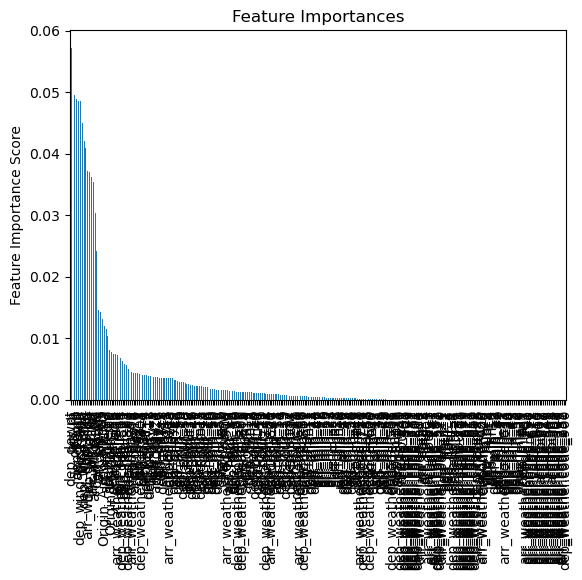

<Figure size 2000x1000 with 0 Axes>

In [40]:
rf = RandomForestClassifier(random_state=50, min_samples_leaf = 6, max_features = "sqrt", n_estimators = 100)

rf = rf.fit(X_train, y_train) 
rf.score(X_train, y_train) 

# rf.feature_importances_
feat_imp = pd.Series(rf.feature_importances_, X_train.columns.values).sort_values(ascending=False)

feat_imp_table = pd.DataFrame(feat_imp)
feat_imp_table = feat_imp_table.reset_index()
feat_imp_table.columns = ['Features', 'Values']
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=[40,20], dpi = 50)
feat_imp.head(12)

test_output = pd.DataFrame(rf.predict(X_test), index = X_test.index, columns = ['pred_Y'])

test_output.head()
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Fraction of correct classification ')
rf.score(X_test, y_test) 

In [41]:
gb = GradientBoostingClassifier(random_state=50, min_samples_split = 12, min_samples_leaf = 6, max_depth = 4, n_estimators = 300)

gb = gb.fit(X_train, y_train) 
gb.score(X_train, y_train) 

0.8657180969319698

In [42]:
linear_reg_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
linear_reg_output.head(20)
gb.score(X_test,y_test)

,pred_arr_status,arr_status
4979,0,2
4823,1,2
4796,0,0
1676,2,0
5619,2,0
2800,1,1
1844,2,2
2037,2,0
4406,2,2
3978,1,2


0.5022222222222222

In [43]:
pred_data1 = pd.read_csv('pred_data1.csv')
pred_data1.head()
pred_data1.dtypes

,Unnamed: 0,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,arr_clouds,arr_dewpt,...,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,0,18,2,ORD,21,2,52,47,77,7.00,...,0.00,983.50,43,0,16.40,24.13,804,73,4.43,3.33
1,2,13,2,JFK,14,2,33,50,84,9.40,...,0.25,"1,015.00",77,0,11.90,0.10,804,96,4.33,3.60
2,4,11,2,MCO,13,2,5,45,86,9.50,...,0.00,"1,015.00",63,0,25.20,26.50,803,150,9.60,6.40
3,6,18,3,ORD,21,3,52,47,89,11.40,...,0.58,971.50,70,0,10.90,24.10,301,323,16.93,11.33
4,8,13,3,JFK,14,3,33,50,92,11.10,...,0.25,"1,011.00",81,0,12.70,24.13,804,140,9.46,6.26


Unnamed: 0             int64
dep_hour               int64
dep_day                int64
Origin_Airport        object
arr_hour               int64
arr_day                int64
dep_min                int64
arr_min                int64
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres             float64
arr_rh                 int64
arr_snow               int64
arr_temp             float64
arr_vis              float64
arr_weather.code       int64
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres             float64
dep_rh                 int64
dep_snow               int64
dep_temp             float64
dep_vis              float64
dep_weather.code       int64
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
dtype: object

In [44]:

pred_data1['dep_min'] = pred_data1['dep_min'].astype('object')
pred_data1['arr_min'] = pred_data1['arr_min'].astype('object')
pred_data1['dep_hour'] = pred_data1['dep_hour'].astype('object')
pred_data1['dep_day'] = pred_data1['dep_day'].astype('object')
pred_data1['arr_hour'] = pred_data1['arr_hour'].astype('object')
pred_data1['arr_day'] = pred_data1['arr_day'].astype('object')
pred_data1['dep_weather.code'] = pred_data1['dep_weather.code'].astype('object')
pred_data1['arr_weather.code'] = pred_data1['arr_weather.code'].astype('object')
pred_data1.drop(columns=['Unnamed: 0'],inplace=True)
pred_data1 = pred_data1[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_clouds', 'arr_dewpt',
       'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis',
       'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd',
       'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh',
       'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code', 'dep_wind_dir',
       'dep_wind_gust_spd', 'dep_wind_spd']]

pred_data1.dtypes

dep_hour              object
dep_day               object
Origin_Airport        object
arr_hour              object
arr_day               object
dep_min               object
arr_min               object
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres             float64
arr_rh                 int64
arr_snow               int64
arr_temp             float64
arr_vis              float64
arr_weather.code      object
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres             float64
dep_rh                 int64
dep_snow               int64
dep_temp             float64
dep_vis              float64
dep_weather.code      object
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
dtype: object

In [45]:
pred_data1['dep_hour'] = pd.Categorical(pred_data1['dep_hour'], categories=[i for i in range(24)])
pred_data1['dep_day'] = pd.Categorical(pred_data1['dep_day'], categories=[i for i in range(7)])
pred_data1['dep_min'] = pd.Categorical(pred_data1['dep_min'], categories=[i for i in range(60)])
pred_data1['arr_hour'] = pd.Categorical(pred_data1['arr_hour'], categories=[i for i in range(24)])
pred_data1['arr_day'] = pd.Categorical(pred_data1['arr_day'], categories=[i for i in range(7)])
pred_data1['arr_min'] = pd.Categorical(pred_data1['arr_min'], categories=[i for i in range(60)])
#su_data['Carrier_Code'] = pd.Categorical(su_data['Carrier_Code'], categories=['AA', 'UA', 'DL', 'B6', 'WN'])
pred_data1['Origin_Airport'] = pd.Categorical(pred_data1['Origin_Airport'], categories=['ORD', 'JFK', 'MCO'])
pred_data1['arr_weather.code'] = pd.Categorical(pred_data1['arr_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
pred_data1['dep_weather.code'] = pd.Categorical(pred_data1['dep_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])



In [46]:
pred_data1 = pd.get_dummies(pred_data1, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
pred_data1.head()
pred_data1.dtypes
pred_data1.columns

,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_wind_dir,arr_wind_gust_spd,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
0,77,7.00,0.25,999.00,66,0,13.30,24.13,100,4.13,...,False,False,False,False,False,False,False,False,True,False
1,84,9.40,0.25,997.50,60,0,17.20,19.70,280,6.90,...,False,False,False,False,False,False,False,False,True,False
2,86,9.50,0.25,997.50,62,0,16.80,22.10,256,6.73,...,False,False,False,False,False,False,False,True,False,False
3,89,11.40,0.76,983.50,70,0,16.90,4.08,150,17.10,...,False,False,False,False,False,False,False,False,False,False
4,92,11.10,0.50,988.50,64,0,18.00,24.13,140,16.40,...,False,False,False,False,False,False,False,False,True,False


arr_clouds                int64
arr_dewpt               float64
arr_precip              float64
arr_pres                float64
arr_rh                    int64
                         ...   
dep_weather.code_801       bool
dep_weather.code_802       bool
dep_weather.code_803       bool
dep_weather.code_804       bool
dep_weather.code_900       bool
Length: 270, dtype: object

Index(['arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_wind_dir', 'arr_wind_gust_spd',
       ...
       'dep_weather.code_721', 'dep_weather.code_731', 'dep_weather.code_741',
       'dep_weather.code_751', 'dep_weather.code_800', 'dep_weather.code_801',
       'dep_weather.code_802', 'dep_weather.code_803', 'dep_weather.code_804',
       'dep_weather.code_900'],
      dtype='object', length=270)

In [47]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
X_test = pd.DataFrame(sc.transform(pred_data1), columns = pred_data1.columns, index = pred_data1.index)


In [50]:
linear_reg_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
#linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
linear_reg_output.head(30)
# mean_absolute_error = abs(linear_reg_output['pred_delay'] - linear_reg_output['arr_delay']).mean()
# print('Mean absolute error is ')
# print(mean_absolute_error)
# maer = mean_absolute_error/linear_reg_output['pred_delay'].mean()
# print('Mean absolute error ratio is ')
# print(maer)
#model.score(X_test, y_test)

,pred_arr_status
0,0
1,0
2,1
3,2
4,0
5,2
6,0
7,0
8,2
9,0


In [49]:
pred_data1.head(20)

,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_wind_dir,arr_wind_gust_spd,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
0,77,7.00,0.25,999.00,66,0,13.30,24.13,100,4.13,...,False,False,False,False,False,False,False,False,True,False
1,84,9.40,0.25,997.50,60,0,17.20,19.70,280,6.90,...,False,False,False,False,False,False,False,False,True,False
2,86,9.50,0.25,997.50,62,0,16.80,22.10,256,6.73,...,False,False,False,False,False,False,False,True,False,False
3,89,11.40,0.76,983.50,70,0,16.90,4.08,150,17.10,...,False,False,False,False,False,False,False,False,False,False
4,92,11.10,0.50,988.50,64,0,18.00,24.13,140,16.40,...,False,False,False,False,False,False,False,False,True,False
5,92,11.10,0.50,988.50,64,0,18.00,24.13,140,16.40,...,False,False,False,False,False,False,False,True,False,False
6,76,3.20,0.25,975.00,62,0,10.10,22.62,233,14.25,...,False,False,False,False,False,False,True,False,False,False
7,82,7.00,0.50,972.50,59,0,14.90,17.46,230,14.10,...,False,False,False,False,False,False,False,False,False,False
8,82,7.00,0.50,972.50,59,0,14.90,17.46,230,14.10,...,False,False,False,False,False,True,False,False,False,False
9,75,1.10,0.00,992.30,66,0,7.00,24.13,276,13.70,...,False,False,False,False,False,False,True,False,False,False
